In [82]:
import h5py
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
file = '/Users/ahyeon/Desktop/sweep_u2-10_c2-50_i50_raw-oc-cluster_uoinmf-bm-predict/umap_clustering_sweep.h5'

In [3]:
f = h5py.File(file, 'r')
print(list(f.keys()))

['cluster_sizes', 'clusters', 'norm_score', 'score', 'seed', 'umap_dimensions', 'umap_embeddings', 'umap_embeddings_dimscale', 'umap_min_dist', 'umap_n_neighbors']


In [39]:
umap_dims = f['umap_dimensions'][:]

In [40]:
f['umap_embeddings_dimscale'][:]

array([ 2,  2,  3,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,
        8,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [41]:
f['umap_embeddings'].dims[1][0]

<HDF5 dataset "umap_embeddings_dimscale": shape (247,), type "<i8">

In [42]:
emb = f['umap_embeddings'][:]
scale = f['umap_embeddings_dimscale'][:][:54]
emb.shape

(50, 247, 54)

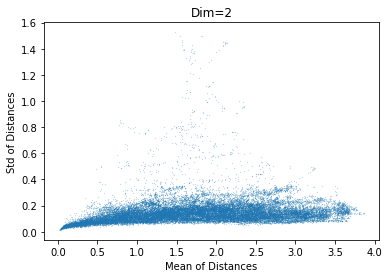

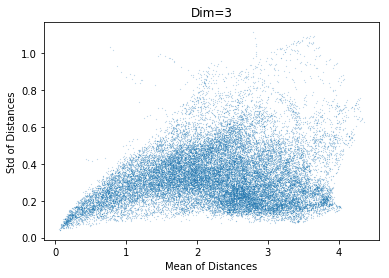

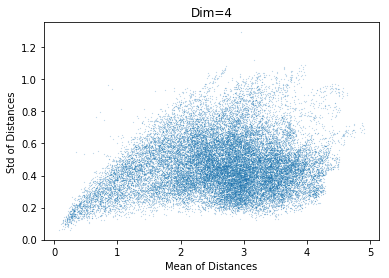

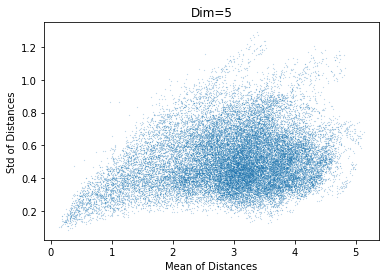

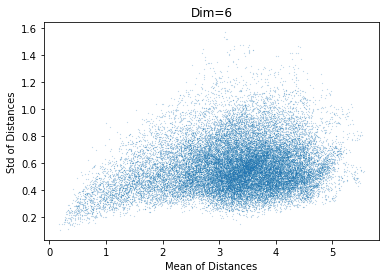

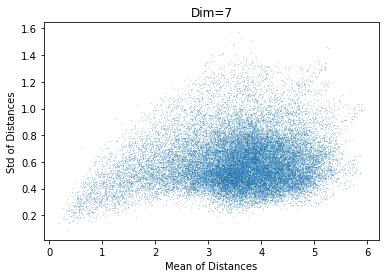

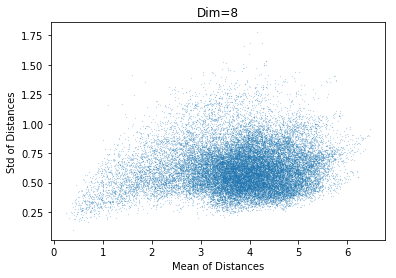

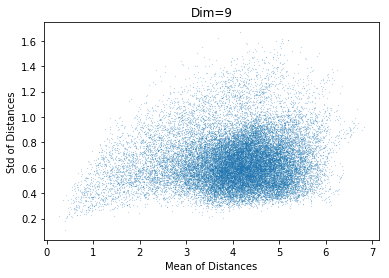

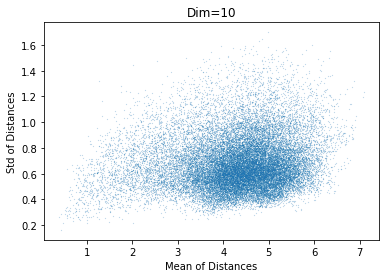

In [83]:
pp = PdfPages('/Users/ahyeon/Desktop/mahalanobis.pdf')

for dim in umap_dims:
    all_dmat = np.zeros((30381,50))
    for x in range(emb.shape[0]):
        dmat = pdist(emb[x][:,scale==dim], metric='mahalanobis')
        all_dmat[:,x] = dmat
    mean = all_dmat.mean(axis=1)
    std = np.std(all_dmat, axis=1)
    fig = plt.figure()
    plt.plot(mean, std, '.', markersize='0.2')
    plt.xlabel('Mean of Distances')
    plt.ylabel('Std of Distances')
    plt.title('Dim={}'.format(dim))
    pp.savefig(fig)
pp.close()


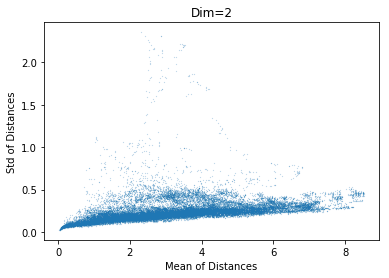

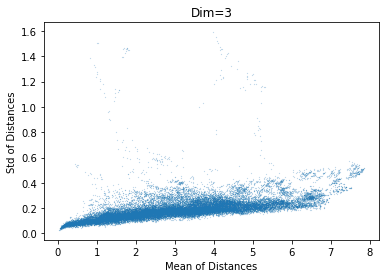

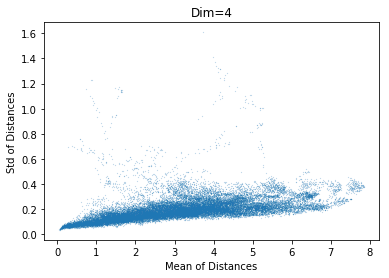

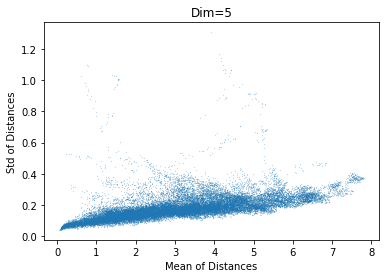

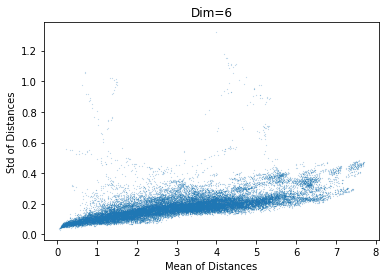

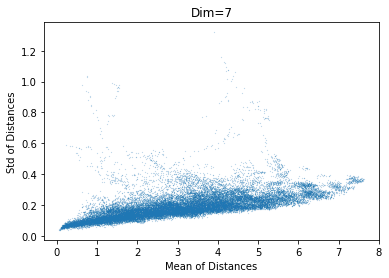

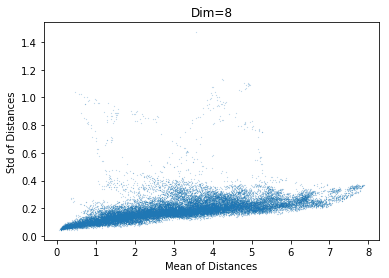

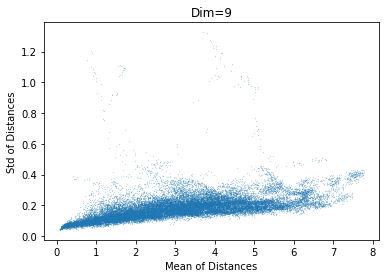

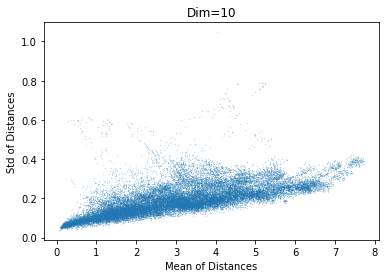

In [84]:
pp = PdfPages('/Users/ahyeon/Desktop/euclidean.pdf')
for dim in umap_dims:
    all_dmat = np.zeros((30381,50))
    for x in range(emb.shape[0]):
        dmat = pdist(emb[x][:,scale==dim], metric='euclidean')
        all_dmat[:,x] = dmat

    mean = all_dmat.mean(axis=1)
    std = np.std(all_dmat, axis=1)
    fig = plt.figure()
    plt.plot(mean, std, '.', markersize='0.2')
    plt.xlabel('Mean of Distances')
    plt.ylabel('Std of Distances')
    plt.title('Dim={}'.format(dim))
    pp.savefig(fig)
pp.close()
    

(array([  7.25000000e+03,   1.51690000e+04,   6.74500000e+03,
          1.01800000e+03,   9.50000000e+01,   6.40000000e+01,
          2.60000000e+01,   1.30000000e+01,   0.00000000e+00,
          1.00000000e+00]),
 array([ 0.03946245,  0.14021861,  0.24097476,  0.34173091,  0.44248706,
         0.54324321,  0.64399936,  0.74475552,  0.84551167,  0.94626782,
         1.04702397]),
 <a list of 10 Patch objects>)

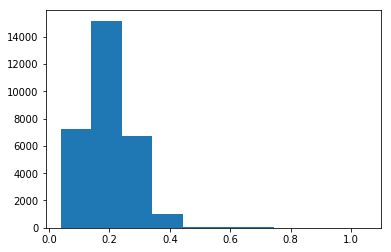

In [99]:
plt.hist(std)

In [118]:
all_dmat.shape

(30381, 50)

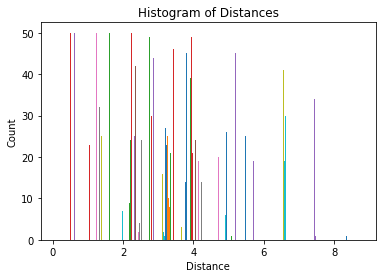

In [148]:
T = all_dmat.T
# plt.hist(T)
plt.hist(T[:,1:2000])
plt.title('Histogram of Distances')
plt.xlabel('Distance')
plt.ylabel('Count')
all_dmat.shape
plt.savefig('/Users/ahyeon/Desktop/histogram.pdf')

In [ ]:
plt.plot(np.linspace(all_dmat),1000)

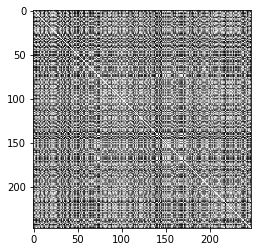

In [57]:
mat = squareform(pdist(emb[0][:,scale==2], metric="mahalanobis"))
plt.imshow(mat, cmap='binary')

In [58]:
dmat = squareform(pdist(emb[:,:,scale==2], metric="mahalanobis"))
dmat2 = squareform(pdist(emb[:,:,scale==2], metric="euclidean"))
print(np.abs(pdist(emb[0][:,scale==3], metric="mahalanobis")-pdist(emb[0][:,scale==3], metric="euclidean")).mean())
#plt.imshow(dmat,cmap='binary')

ValueError: A 2-dimensional array must be passed.

In [59]:

np.where(f['umap_embeddings_dimscale'][:] > 0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),)